In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix


In [3]:
iris = datasets.load_iris()
#print(iris.data)

In [6]:
x = iris.data[:, :2]
y = iris.target
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, train_size=0.80, test_size=0.20, random_state=101)
 
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((120, 2), (30, 2), (120,), (30,))

In [7]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(x_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(x_train, y_train)

In [9]:
poly_pred = poly.predict(x_test)
rbf_pred = rbf.predict(x_test)

In [10]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  70.00
F1 (Polynomial Kernel):  69.67


In [11]:
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  76.67
F1 (RBF Kernel):  76.36


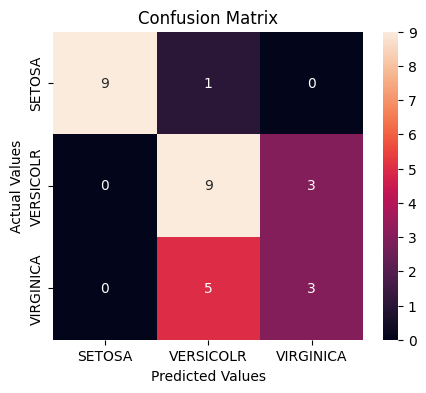

In [15]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, poly_pred)

# Display the confusion matrix
cm_df = pd.DataFrame(
    cm,
    index=["SETOSA", "VERSICOLR", "VIRGINICA"],
    columns=["SETOSA", "VERSICOLR", "VIRGINICA"],
)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_df, annot=True)
plt.title("Confusion Matrix")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

In [16]:
# Extract TP, TN, FP, FN values for the "Setosa" class (class 0)
setosa_index = 0
TP = cm[setosa_index, setosa_index]
TN = np.sum(np.delete(np.delete(cm, setosa_index, axis=0), setosa_index, axis=1))
FP = np.sum(cm[:, setosa_index]) - TP
FN = np.sum(cm[setosa_index, :]) - TP

print("True Positives (Setosa):", TP)
print("True Negatives (Setosa):", TN)
print("False Positives (Setosa):", FP)
print("False Negatives (Setosa):", FN)

True Positives (Setosa): 9
True Negatives (Setosa): 20
False Positives (Setosa): 0
False Negatives (Setosa): 1


In [ ]:
# Define the index for the "Setosa" class in the confusion matrix (class 0)
setosa_index = 0

# Calculate True Positives (TP): The count of correct predictions for the "Setosa" class.
TP = cm[setosa_index, setosa_index]

# Calculate True Negatives (TN):
#   1. Remove the row and column corresponding to the "Setosa" class from the confusion matrix.
#   2. Sum all remaining values in the modified confusion matrix to get TN.
TN = np.sum(np.delete(np.delete(cm, setosa_index, axis=0), setosa_index, axis=1))

# Calculate False Positives (FP):
#   1. Sum all values in the column corresponding to the "Setosa" class in the original confusion matrix.
#   2. Subtract TP (True Positives) from the sum to get FP.
FP = np.sum(cm[:, setosa_index]) - TP

# Calculate False Negatives (FN):
#   1. Sum all values in the row corresponding to the "Setosa" class in the original confusion matrix.
#   2. Subtract TP (True Positives) from the sum to get FN.
FN = np.sum(cm[setosa_index, :]) - TP
